# 1. Import & Loading
___

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from feature_selection_functions import generate_metadata
filterwarnings(action= 'ignore')
pd.options.display.max_columns = None

In [2]:
public = pd.read_csv('./DATASETS/tb_crm_clientes.csv')
display(public.head())
print(f'Dimensões: {public.shape}')

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Dimensões: (2240, 29)


In [3]:
# Criando uma Flag para checar se o cliente aderiu alguma das campanhas
public['FL_AderiuAlgumaCampanha'] = public[['AceitouCampanha1', 'AceitouCampanha2', 'AceitouCampanha3', 'AceitouCampanha4', 'AceitouCampanha5', 'AceitouUltimaCampanha']].any(axis=1).astype(int)

In [4]:
generate_metadata(dataframe= public).sort_values(by = 'cardinalidade', ascending= False)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
1,IDCliente,int64,0,0.00,2240
0,RendaAnualFamiliar,float64,24,1.07,1974
22,GastoComVinhoNosUltimos2Anos,int64,0,0.00,776
24,DataDeInscricao,object,0,0.00,663
20,GastoComCarneNosUltimos2Anos,int64,0,0.00,558
17,GastoComOuroNosUltimos2Anos,int64,0,0.00,213
19,GastoComPeixeNosUltimos2Anos,int64,0,0.00,182
18,GastoComDocesNosUltimos2Anos,int64,0,0.00,177
21,GastoComFrutasNosUltimos2Anos,int64,0,0.00,158
23,DiasDesdeUltimaCompra,int64,0,0.00,100


# 2. EDA
___

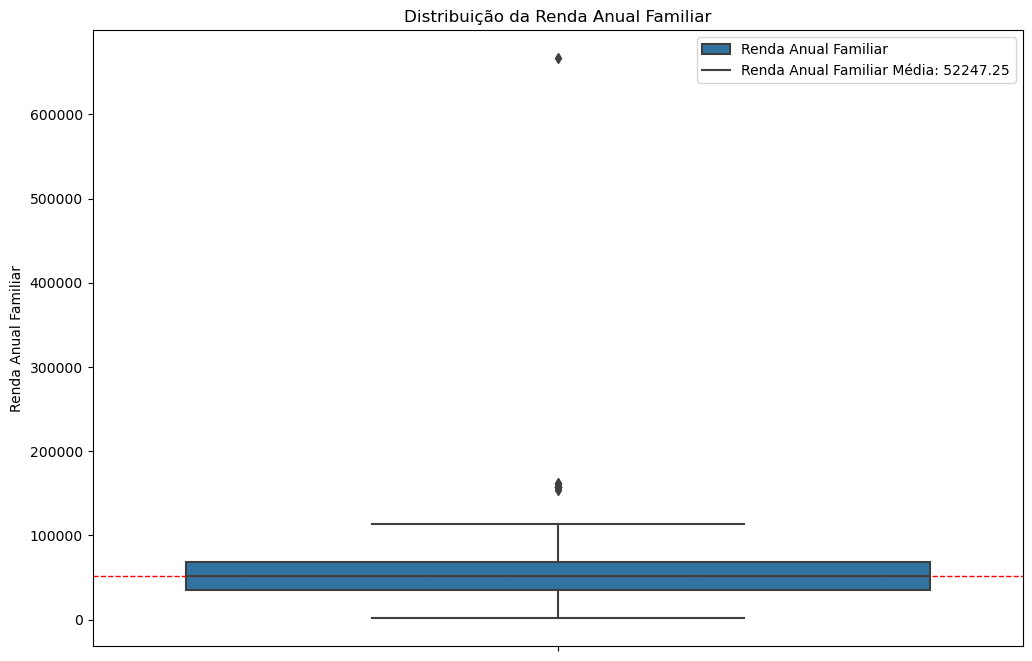

In [5]:
aux = public['RendaAnualFamiliar'].mean()

plt.figure(figsize=(12,8))

fig = sns.boxplot(
    data = public,
    y= 'RendaAnualFamiliar',
    orient= 'v'
)

plt.axhline(aux, c= 'red', ls= 'dashed', linewidth= 1)

plt.legend(['Renda Anual Familiar', 'Renda Anual Familiar Média: {:.2f}'.format(aux)], loc= 'upper right')

plt.ylabel('Renda Anual Familiar')
plt.title('Distribuição da Renda Anual Familiar')

plt.show()

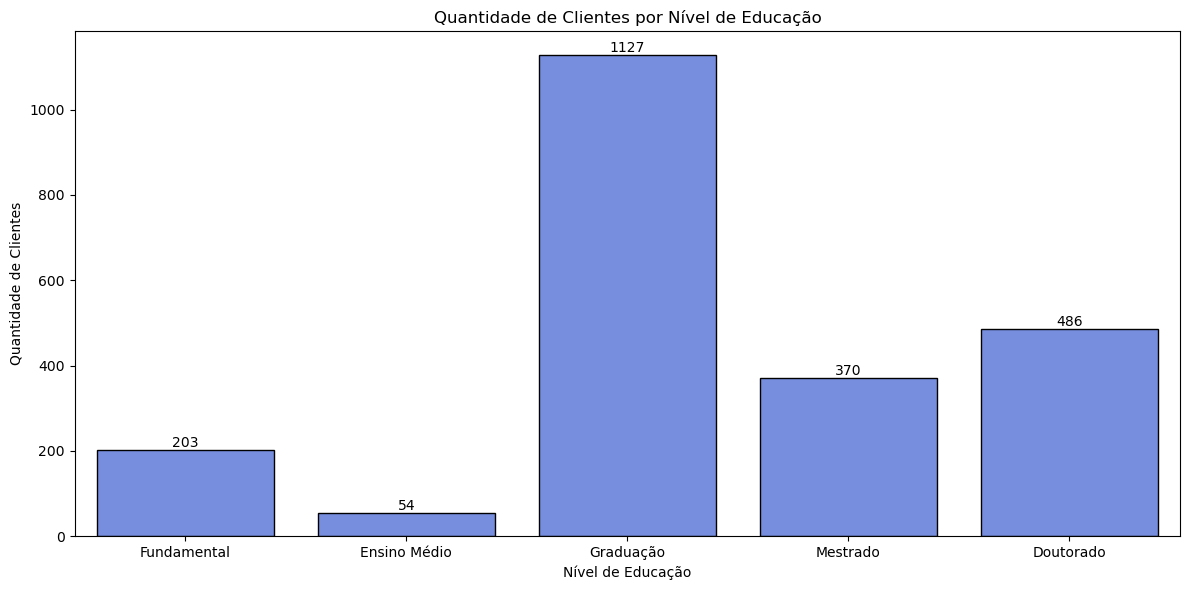

In [6]:
ordem_educacao = ['Fundamental', 'Ensino Médio', 'Graduação', 'Mestrado', 'Doutorado']

funcao_counts = public['NivelDeEducacao'].value_counts().reindex(ordem_educacao)

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='NivelDeEducacao', data=public, order=ordem_educacao, color= (102/255, 132/255, 240/255, 0.64), edgecolor= 'black')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Nível de Educação')
plt.tight_layout()
plt.show()

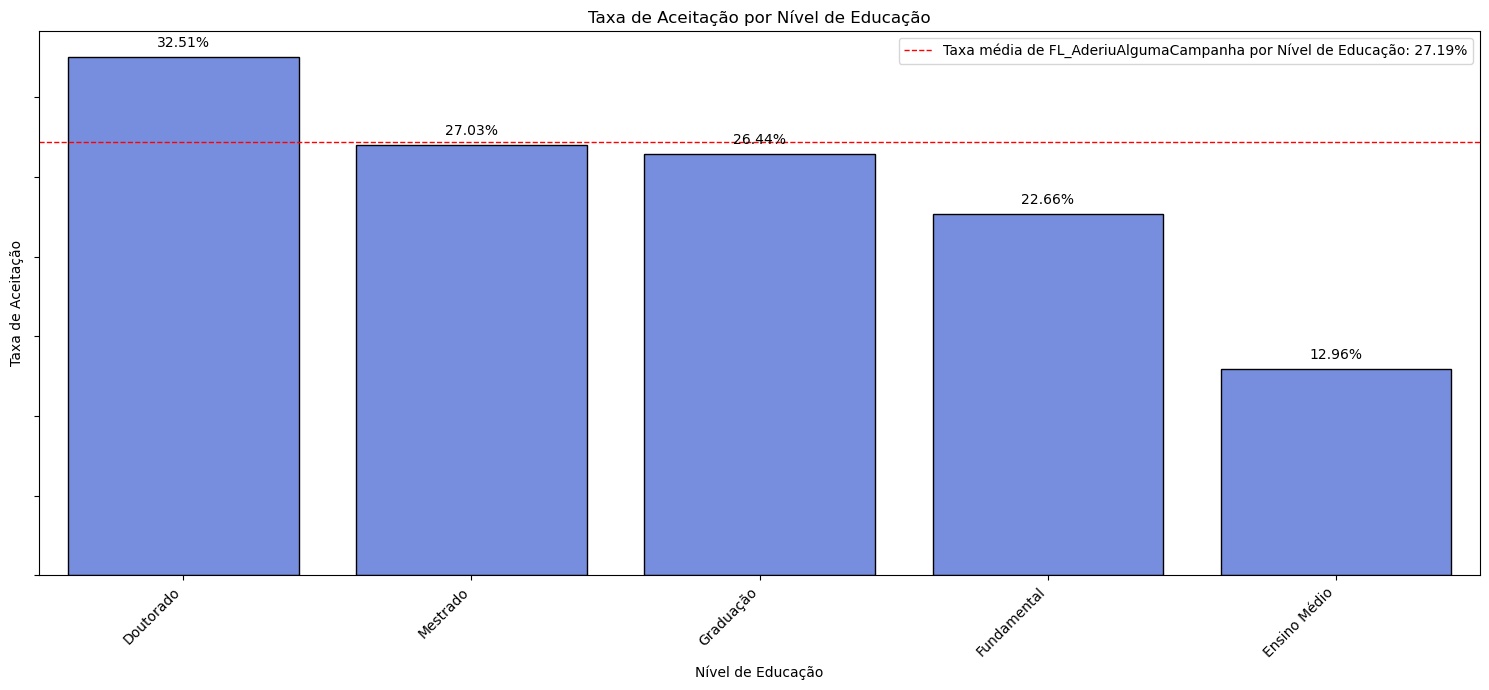

In [7]:
# Calculando a taxa de aceitacao para cada função
taxa_aceitacao_por_funcao = public.groupby('NivelDeEducacao')['FL_AderiuAlgumaCampanha'].apply(lambda x: (x == 1).mean())

# Ordenando as funções por taxa de aceitacao
funcoes_ordenadas = taxa_aceitacao_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(15,7))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values, color= (102/255, 132/255, 240/255, 0.64), edgecolor= 'black')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de Aceitação
taxa_media_aceitacao_funcao = public['FL_AderiuAlgumaCampanha'].value_counts(normalize=True).get(1, 0)
plt.axhline(taxa_media_aceitacao_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de FL_AderiuAlgumaCampanha por Nível de Educação: {:.2f}%'.format(taxa_media_aceitacao_funcao * 100))

plt.xlabel('Nível de Educação')
plt.ylabel('Taxa de Aceitação')
plt.title('Taxa de Aceitação por Nível de Educação')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

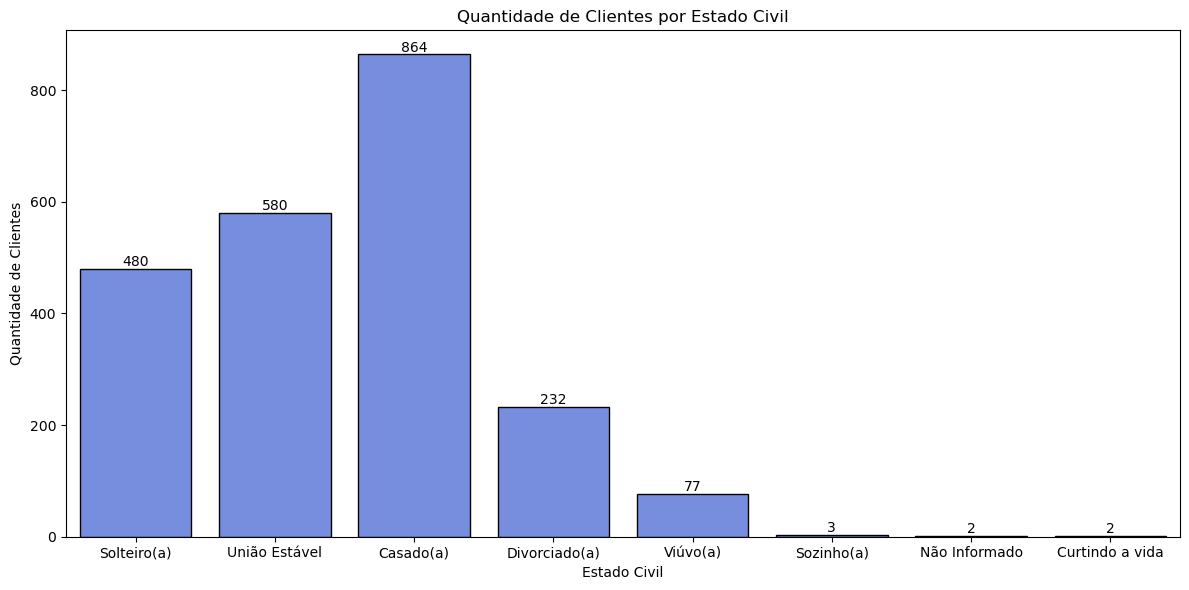

In [8]:
plt.figure(figsize=(12, 6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='EstadoCivil', data=public, color= (102/255, 132/255, 240/255, 0.64), edgecolor= 'black')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Estado Civil')
plt.tight_layout()
plt.show()

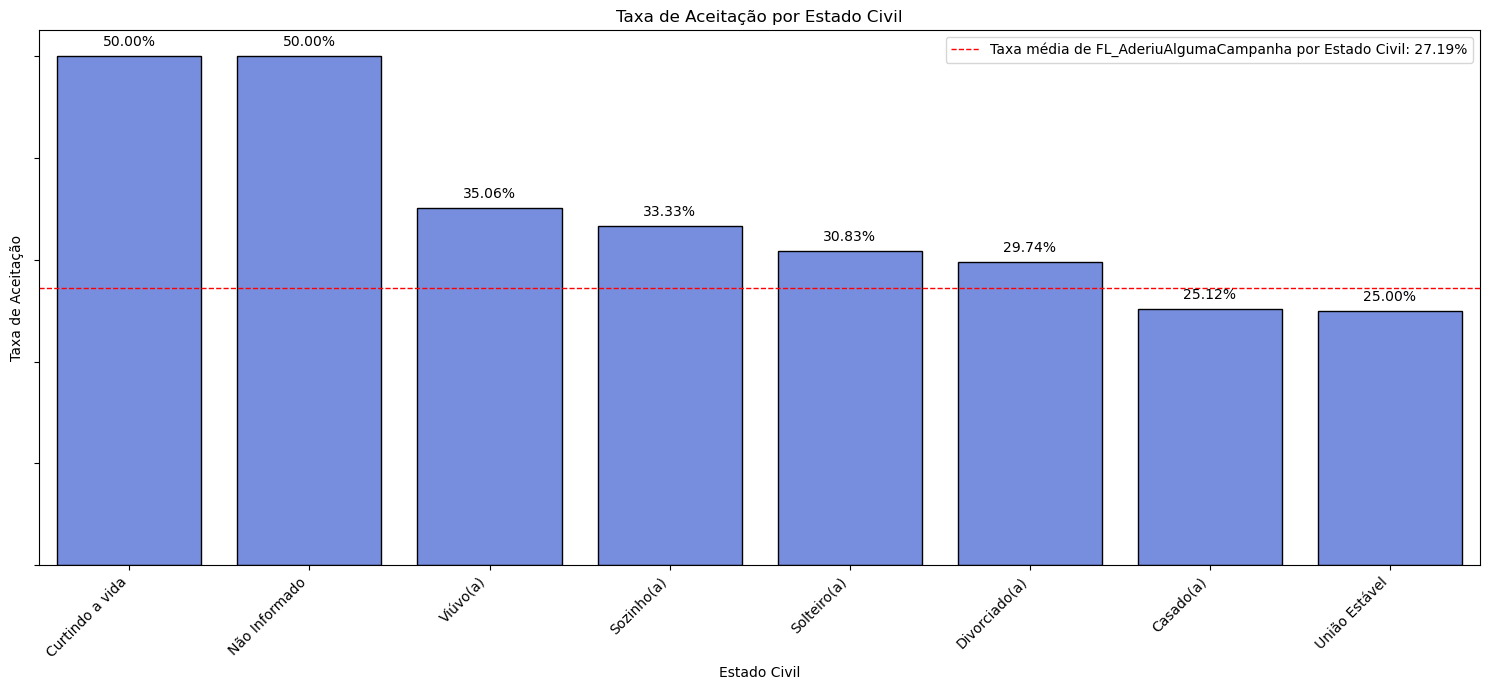

In [9]:
# Calculando a taxa de aceitacao para cada função
taxa_aceitacao_por_funcao = public.groupby('EstadoCivil')['FL_AderiuAlgumaCampanha'].apply(lambda x: (x == 1).mean())

# Ordenando as funções por taxa de aceitacao
funcoes_ordenadas = taxa_aceitacao_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(15,7))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values, color= (102/255, 132/255, 240/255, 0.64), edgecolor= 'black')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de Aceitação
taxa_media_aceitacao_funcao = public['FL_AderiuAlgumaCampanha'].value_counts(normalize=True).get(1, 0)
plt.axhline(taxa_media_aceitacao_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de FL_AderiuAlgumaCampanha por Estado Civil: {:.2f}%'.format(taxa_media_aceitacao_funcao * 100))

plt.xlabel('Estado Civil')
plt.ylabel('Taxa de Aceitação')
plt.title('Taxa de Aceitação por Estado Civil')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

# 3. Criação do Modelo
___

## 3.1. Data Preparation

### Feature Engineering

In [10]:
from datetime import datetime

In [11]:
ano_atual = datetime.now().year
data_atual = datetime.now()

# Criando a variável 'Idade'
public['Idade'] = ano_atual - public['AnoDeNascimento']

# Ajustando o tipo da variável DataDeInscricao
public['DataDeInscricao'] = pd.to_datetime(public['DataDeInscricao'])

# Calculando a quantidade de dias desde a inscrição
public['DiasDesdeInscricao'] = (data_atual - public['DataDeInscricao']).dt.days

# Criar uma variável contando a quantidade de pessoas na residência de cada cliente
def calcular_total_pessoas(row):
    if row['EstadoCivil'] == 'Casado(a)' or row['EstadoCivil'] == 'União Estável':
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 2
    else:
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 1

# Aplicando a função para calcular a quantidade total de pessoas na casa
public['TotalPessoasNaCasa'] = public.apply(calcular_total_pessoas, axis=1)

# Calcular a renda per capita familiar
public['RendaAnualPerCapitaFamiliar'] = public['RendaAnualFamiliar'] / public['TotalPessoasNaCasa']

# Calcular indicador de Razão entre indicador de Receita e indicador de Custo Contato
public['IndicadorRazaoReceitaPorCustoContato'] = public['IndicadorDeReceita'] / public['IndicadorCustoContato']

### Encoding

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

num_features = public.drop(columns = ['IDCliente', 'AnoDeNascimento', 'DataDeInscricao']).select_dtypes(exclude= 'object').columns
cat_features = public.drop(columns = ['IDCliente', 'AnoDeNascimento', 'DataDeInscricao']).select_dtypes(include= 'object').columns

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop= 'first'))
    ]
)

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy= 'median')),
        ('scaler', RobustScaler())
    ]
)

# Combinação das Pipelines
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_features),
    ('numerical', num_pipeline, num_features)
])

# Aplicando o preprocessador

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

abt = pipeline.fit_transform(public)

ohe_column_names = pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['encoder'].get_feature_names_out(input_features=cat_features)

abt_feature_names = ohe_column_names.tolist() + num_features.tolist()

abt_transformed = pd.DataFrame(data= abt, columns = abt_feature_names)

abt_transformed

,NivelDeEducacao_Ensino Médio,NivelDeEducacao_Fundamental,NivelDeEducacao_Graduação,NivelDeEducacao_Mestrado,EstadoCivil_Curtindo a vida,EstadoCivil_Divorciado(a),EstadoCivil_Não Informado,EstadoCivil_Solteiro(a),EstadoCivil_Sozinho(a),EstadoCivil_União Estável,EstadoCivil_Viúvo(a),RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha,FL_AderiuAlgumaCampanha,Idade,DiasDesdeInscricao,TotalPessoasNaCasa,RendaAnualPerCapitaFamiliar,IndicadorRazaoReceitaPorCustoContato
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.206299,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.722222,1.329463,-2.0,2.001690,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.153812,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,-1.126270,0.0,-0.162359,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.617737,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,-0.119013,-1.0,0.869658,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.755259,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778,-1.300435,0.0,-0.495203,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211032,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111,-0.557329,0.0,0.039548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300495,0.0,1.0,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,0.0,1.25,0.25,-0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.081277,0.0,0.089058,0.0
2236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.385713,2.0,1.0,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,2.5,1.00,0.00,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.333333,-1.312046,2.0,-0.296449,0.0
2237,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.170972,0.0,0.0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,-0.5,-0.50,0.25,1.6,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.611111,-0.574746,-2.0,1.943039,0.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545434,0.0,1.0,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,0.0,0.50,0.75,1.0,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,-0.571843,0.0,0.224609,0.0


### Redução de Dimensionalidade

In [13]:
from sklearn.decomposition import PCA

* Criando as componentes principais para reter 90% da variância dos dados

In [14]:
decomp = PCA(n_components= 0.90)
decomp.fit(abt_transformed)
abt_transformed_decomp = decomp.transform(abt_transformed)
abt_transformed_decomp = pd.DataFrame(abt_transformed_decomp, columns= ['PC_'+ str(idx) for idx in range(1,abt_transformed_decomp.shape[1]+1)])
abt_transformed_decomp.shape

(2240, 15)

* Foram criadas 15 componentes principais. Vamos checar quanto da variância dos dados está contida em cada componente principal:

In [15]:
n_pca = abt_transformed_decomp.shape[1]

In [16]:
pca_explained_variance = pd.DataFrame(
    data = decomp.explained_variance_ratio_,
    index= ["PC"+str(_) for _ in range(1,n_pca+1)],
    columns= ['variancia_explicada']
).mul(100).round(3)
pca_explained_variance

,variancia_explicada
PC1,38.695
PC2,9.558
PC3,6.785
PC4,5.366
PC5,4.440
PC6,4.216
PC7,3.670
PC8,3.145
PC9,2.835
PC10,2.395


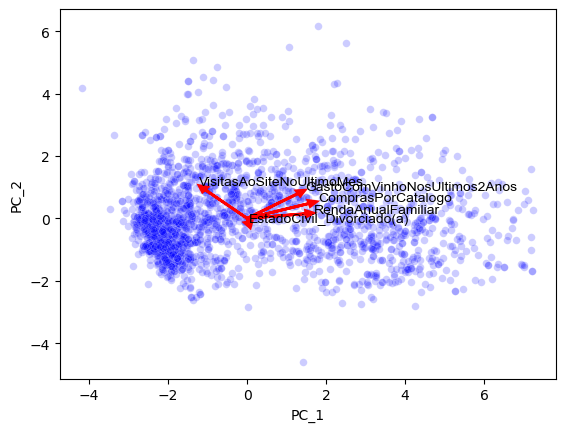

In [17]:
ax = sns.scatterplot(
    data = abt_transformed_decomp,
    x = 'PC_1',
    y = 'PC_2',
    alpha = 0.2,
    s = 30,
    c= 'blue'
    # hue= 'cluster'
)

reduced_data = pd.DataFrame(decomp.components_, columns= decomp.feature_names_in_)
reduced_data = reduced_data[['RendaAnualFamiliar', 'ComprasPorCatalogo', 'VisitasAoSiteNoUltimoMes', 'GastoComVinhoNosUltimos2Anos', 'EstadoCivil_Divorciado(a)']]
feature_vectors = np.array(reduced_data).T

arrow_size, text_pos = 7.0, 8.0


for i,v in enumerate(feature_vectors):
    ax.arrow(
        0,
        0,
        arrow_size*v[0], # Pegando o valor da variável 1 na componente principal 1,
        arrow_size*v[1], # Pegando o valor da variável 1 na componente principal 2,
        head_width=0.2,
        head_length=0.2,
        linewidth=2,
        color='red'
    )

    ax.text(
        v[0]*text_pos, # Eixo x
        v[1]*text_pos, # Eixo y
        reduced_data.columns[i], # Texto: Nome da Coluna,
        color= 'black', # Cor do Texto
        fontdict={'family' : 'Arial'}
    )
plt.show(ax)

## 3.2. Treinamento do Modelo

### Selecionando o Número de Clusters
* Usando o Método da Silhueta

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**************************************************
Iteração: 1
Silhouette Score: 0.3635
**************************************************
Iteração: 2
Silhouette Score: 0.2218
**************************************************
Iteração: 3
Silhouette Score: 0.2153
**************************************************
Iteração: 4
Silhouette Score: 0.2101
**************************************************
Iteração: 5
Silhouette Score: 0.1222
**************************************************
Iteração: 6
Silhouette Score: 0.1224
**************************************************
Iteração: 7
Silhouette Score: 0.1186
**************************************************
Iteração: 8
Silhouette Score: 0.12
**************************************************


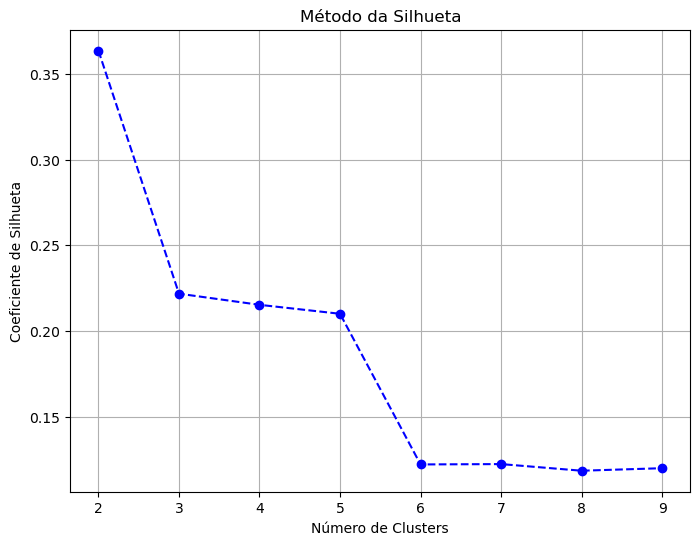

In [19]:
# Lista para armazenar os scores
scores = []

# Determinando o numero maximo e minimo de clusters
k_min = 2
k_max = 10

for iteracao, k in enumerate(range(k_min, k_max)):
    # Instanciando o modelo com o número de clusters da iteração atual
    model_kmeans = KMeans(
        n_clusters= k,
        random_state= 0,
        n_init= 'auto'
    )
    
    # Salvando os clusters gerados
    labels = model_kmeans.fit_predict(abt_transformed_decomp)

    # Salvando os scores
    score_temp = silhouette_score(
        X= abt_transformed_decomp,
        labels= labels
    )

    scores.append(score_temp)
    print('*'*50)
    print(f'Iteração: {iteracao+1}\nSilhouette Score: {round(score_temp,4)}')

print('*'*50)
plt.figure(figsize=(8, 6))
plt.plot(range(k_min, k_max), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(k_min, k_max))
plt.grid(True)
plt.show()

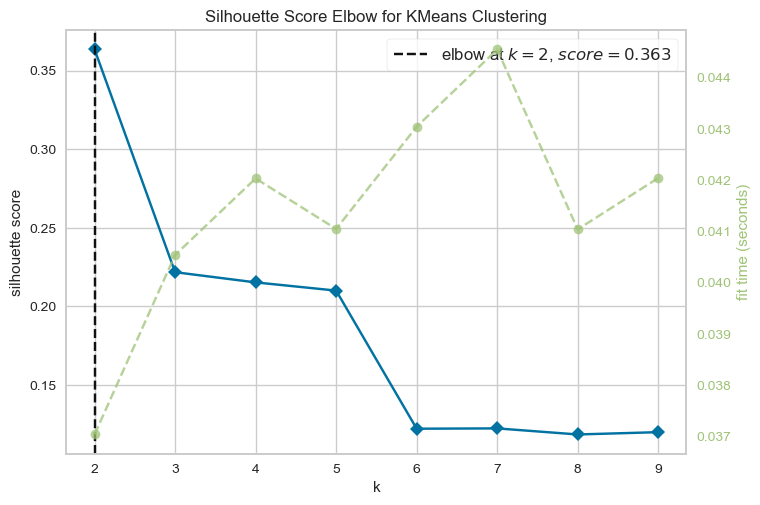

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True);
visualizer.fit(abt_transformed_decomp)
visualizer.show(); 

### Treinando o Modelo
* Gaussian Mixture

In [21]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')  # Inicialize com um valor infinito
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=2)
        gmm.fit(abt_transformed_decomp)
        bic_score = gmm.bic(abt_transformed_decomp)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('full', 6)
Menor BIC: 54456.63478949155


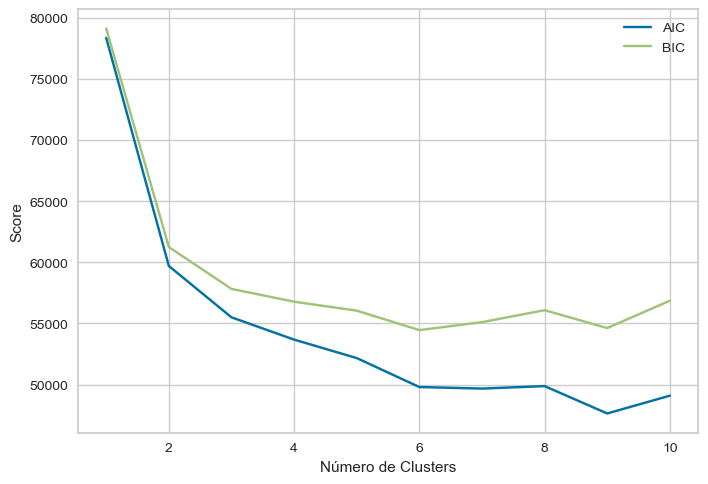

In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=2)
    gmm.fit(abt_transformed_decomp)
    aic_scores.append(gmm.aic(abt_transformed_decomp))
    bic_scores.append(gmm.bic(abt_transformed_decomp))

# Plotar AIC e BIC em função do número de clusters

plt.plot(range(1, 11), aic_scores, label='AIC')
plt.plot(range(1, 11), bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

In [23]:
from sklearn.mixture import GaussianMixture
# Inicializar o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=2)

# Ajustar o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(abt_transformed_decomp)

# Prever os rótulos dos clusters
labels = gmm.predict(abt_transformed_decomp)

public['Cluster'] = labels

np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int64)

## 3.3. Análise de Clusters

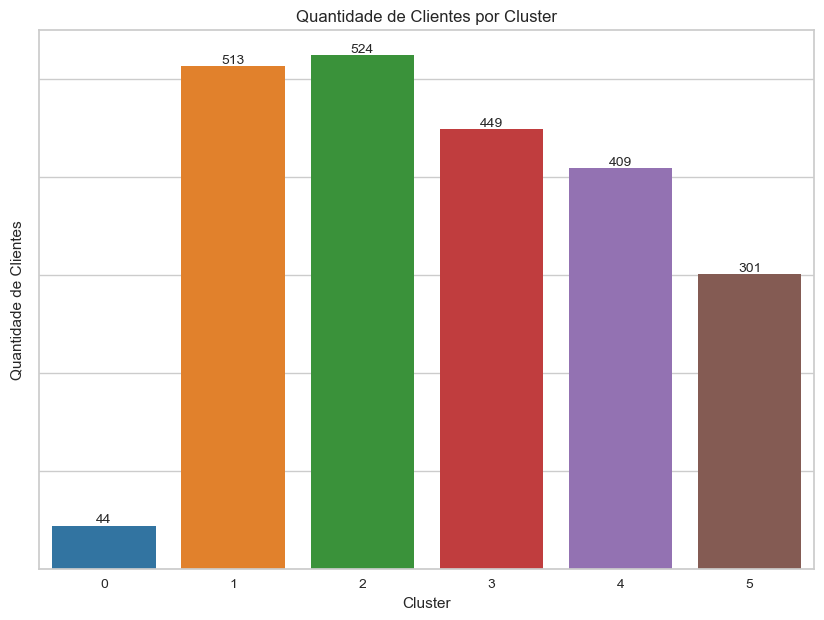

In [24]:
# Definindo a paleta de cores
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
unique_labels = np.unique(public['Cluster'])
pal = pal[:len(unique_labels)]

plt.figure(figsize=(10,7))
pl = sns.countplot(data=public, x="Cluster", palette=pal)

for container in pl.containers:
    pl.bar_label(container, fontsize=10)

pl.set_title("Quantidade de Clientes por Cluster")
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Clientes')
plt.show()


Insights:

* Cluster 0: Com apenas 44 clientes, este cluster é bem menor que os outros, e pode ser composto por clientes com características muito específicas (ou até atípicas).

> Ação: Investigar os clientes desse cluster para entender se há algum padrão que possa ser explorado e entender . Pode ser interessante criar estratégias personalizadas para atender a esses clientes de forma mais eficaz.

* Clusters 1 a 5: Estes clusters têm uma quantidade significativa de clientes, variando de 301 a 524.

> Ação: Desenvolver estratégias de marketing e campanhas de retenção específicas para cada cluster, considerando o comportamento das variáveis nestes clusters (conforme veremos a seguir).

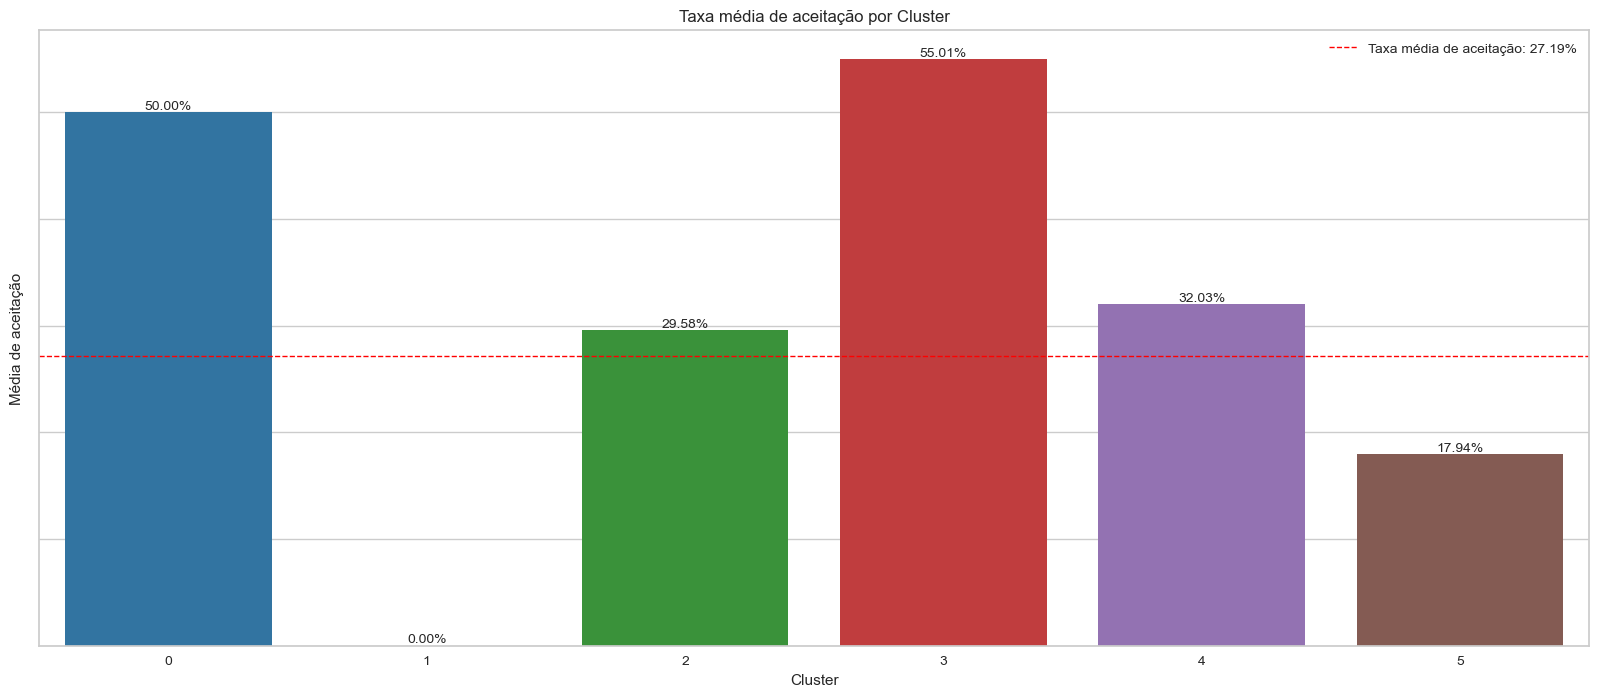

In [25]:
taxa_media_aceitacao = public['FL_AderiuAlgumaCampanha'].value_counts(normalize=True).get(1, 0)

public['TARGET'] = (public['FL_AderiuAlgumaCampanha'] == 1).astype(int)

# Calcular a média da variável "FL_AderiuAlgumaCampanha" para cada cluster
mean_aceitacao_by_cluster = public.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(20, 8))
sns.barplot(x="Cluster", y="TARGET", data=mean_aceitacao_by_cluster, palette=pal)
plt.axhline(taxa_media_aceitacao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de aceitação: {:.2f}%'.format(taxa_media_aceitacao * 100))

plt.title("Taxa média de aceitação por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Média de aceitação")


# Adicionando os valores das taxas de aceitacao nas barras
for i, taxa in enumerate(mean_aceitacao_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

Insights:


* Cluster 0: Possui uma alta taxa de aceitação (50%), mas é composto por poucos clientes.
> Ação: Apesar do pequeno tamanho, esse cluster demonstra uma alta propensão a aceitar campanhas. Focar em ofertas exclusivas e programas de fidelidade pode ser benéfico.


* Cluster 1: Não possui nenhuma aceitação de campanhas e é o segundo maior cluster.
> Ação: Cabe um estudo específico pra este cluster, para entender a fundo as características desses clientes que não possuem


* Cluster 2: Possui uma taxa de aceitação de 29,58%, ligeiramente acima da média.
> Ação: Continuar monitorando e refinando as campanhas para melhorar a aceitação. Personalizar as ofertas com base no comportamento de compra pode aumentar a eficácia.


* Cluster 3: Apresenta a maior taxa de aceitação (55,01%).
> Ação: Este cluster é altamente responsivo. Investir mais em campanhas direcionadas para esse grupo pode trazer um retorno significativo. Talvez programas de recompensas e exclusividades. Também vale a pena estudar a fundo este cluster em específico, para extrair informações do que levam esses clientes a serem tão responsivos.


* Cluster 4: Taxa de aceitação de 32,03%, também acima da média.
> Ação: Seguir com estratégias que tenham funcionado, buscando sempre personalizar e otimizar as ofertas.


* Cluster 5: Taxa de aceitação de 17,94%, abaixo da média.
> Ação: Reavaliar as campanhas e tentar entender as barreiras para aceitação. Ajustar as campanhas para alinhar melhor com os interesses e necessidades desse grupo.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


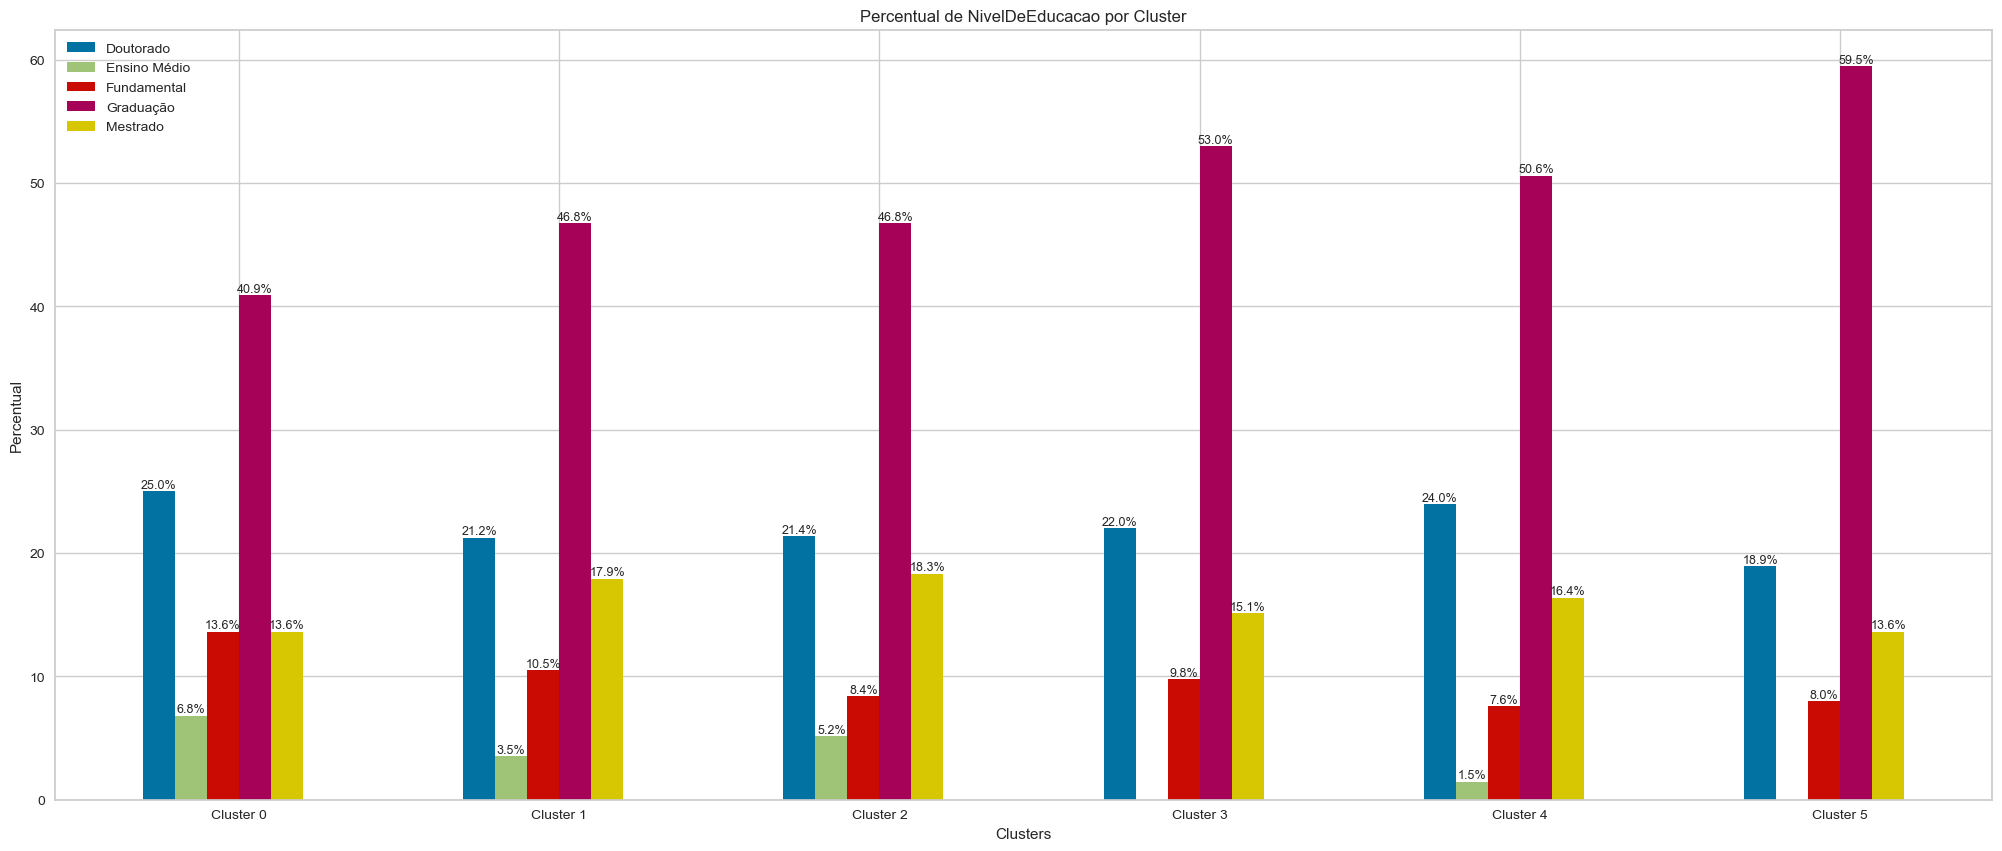

In [26]:
for var in ['NivelDeEducacao']:
  percentuais_por_cluster = public.groupby('Cluster')[var].value_counts(normalize=True).mul(100).unstack().reset_index().values

  clusters = percentuais_por_cluster[:, 0]
  percentuais = percentuais_por_cluster[:, 1:]

  bar_width = 0.1

  x = np.arange(len(clusters))

  plt.figure(figsize=(25, 10))

  unicos = sorted(public[var].unique())
  for i in range(len(percentuais[0])):
      j = unicos[i]
      plt.bar(x + i * bar_width, percentuais[:, i], bar_width, label=f'{j}')
      for j, val in enumerate(percentuais[:, i]):
          plt.text(x[j] + i * bar_width, val, '{:.1f}%'.format(val), ha='center', va='bottom', fontsize=9);

  plt.xlabel('Clusters');
  plt.ylabel('Percentual');
  plt.title(f'Percentual de {var} por Cluster');
  plt.xticks(x + bar_width * len(percentuais[0]) / 2, [f'Cluster {int(cluster)}' for cluster in clusters]);
  plt.legend(loc='best');

  plt.show()

Cluster 0:

Predominância de clientes com Graduação (40,9%) e uma significativa proporção com Doutorado (25%).

Cluster 1:

Alta concentração de clientes com Ensino Médio (46,8%) e uma parcela significativa com Mestrado (17,9%).

Cluster 2:

Predominância de clientes com Ensino Médio (46,8%) e uma proporção significativa com Mestrado (18,3%).


Cluster 3:

Alta concentração de clientes com Ensino Médio (53%) e uma parcela significativa com Mestrado (15,1%).


Cluster 4:

Predominância de clientes com Ensino Médio (50,6%) e uma boa representação com Doutorado (24%).


Cluster 5:

Alta concentração de clientes com Ensino Médio (59,6%) e uma proporção significativa com Mestrado (13,6%).

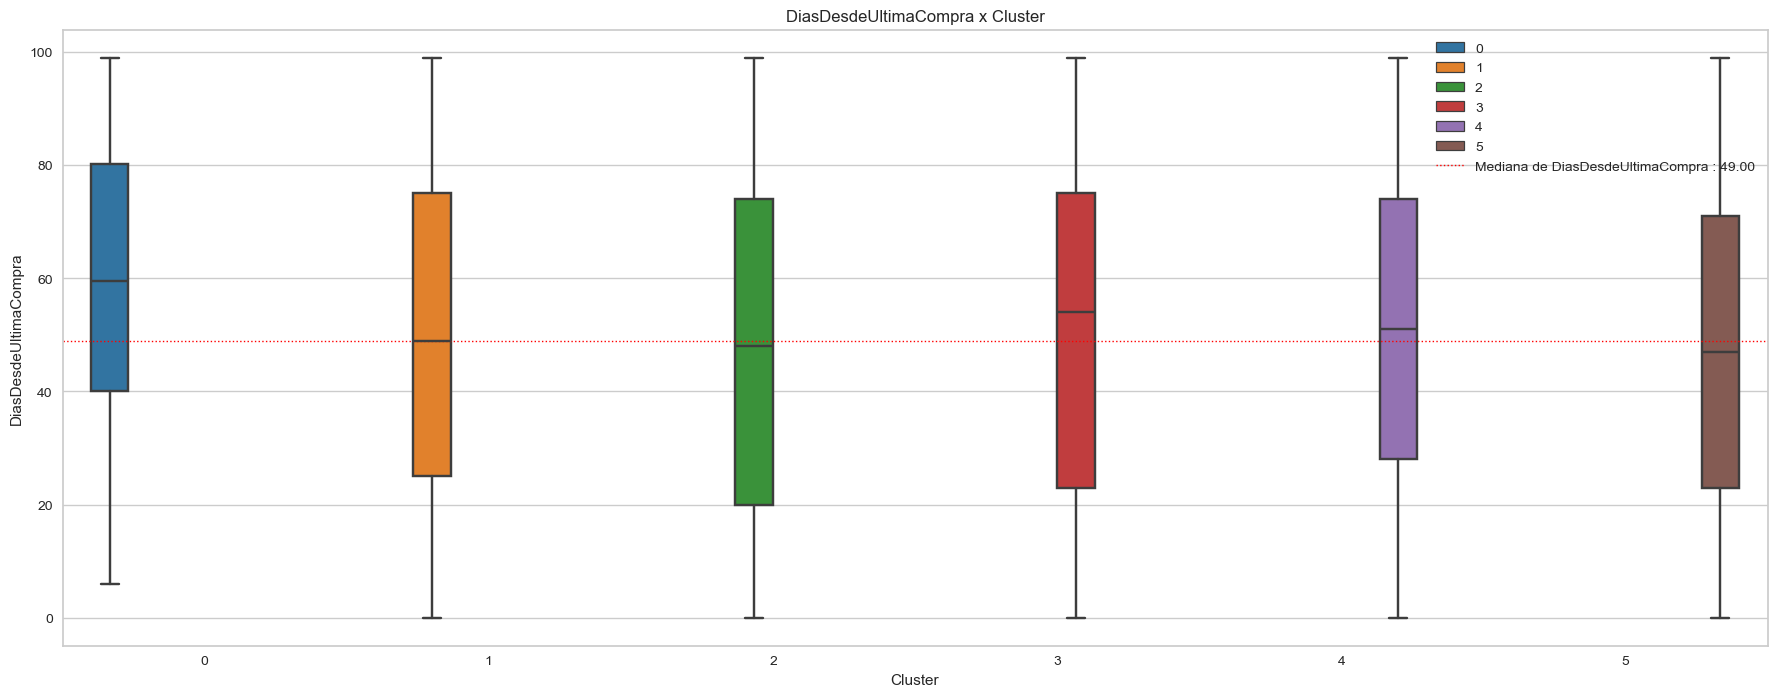

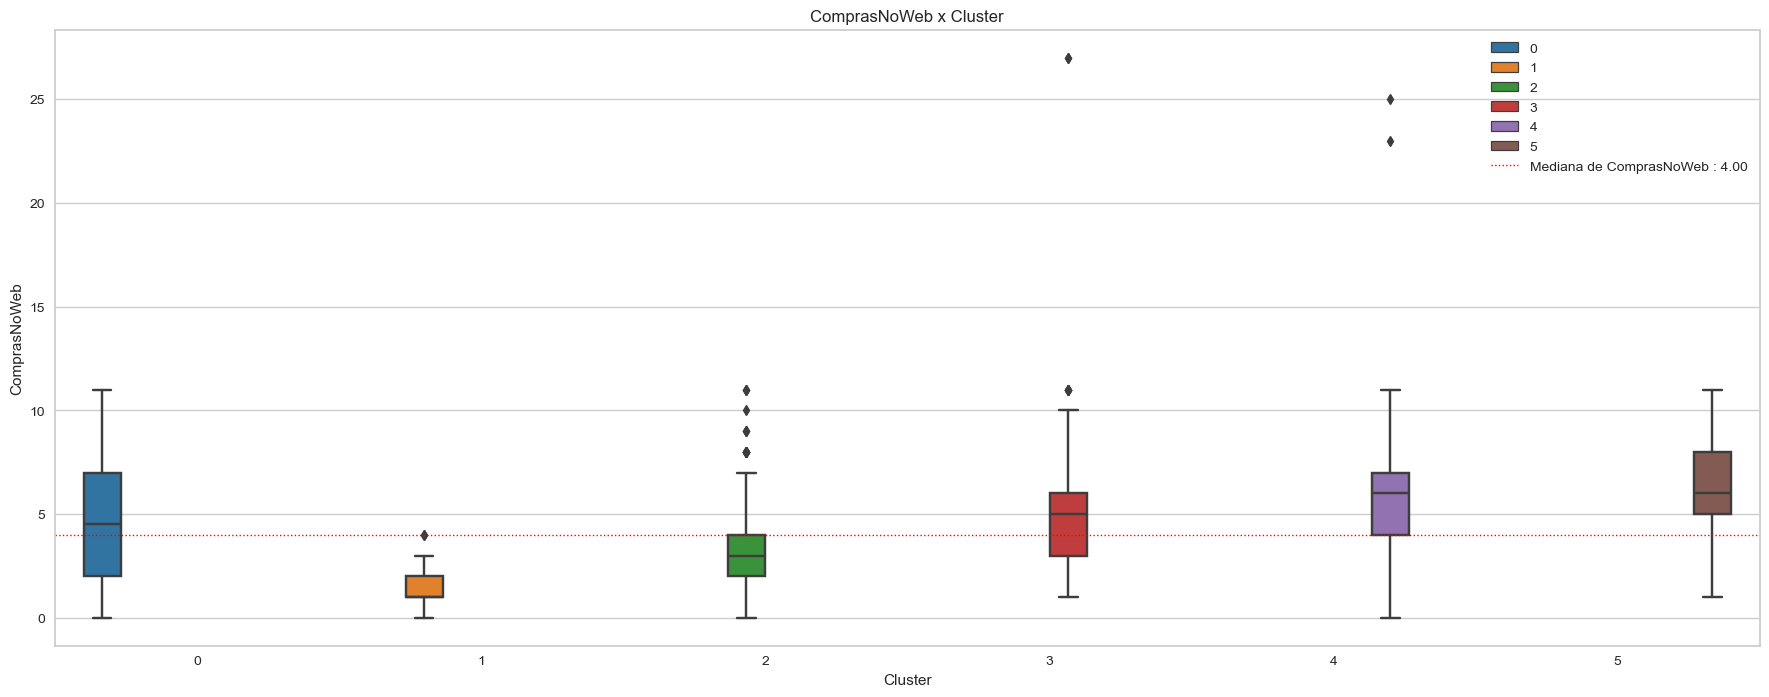

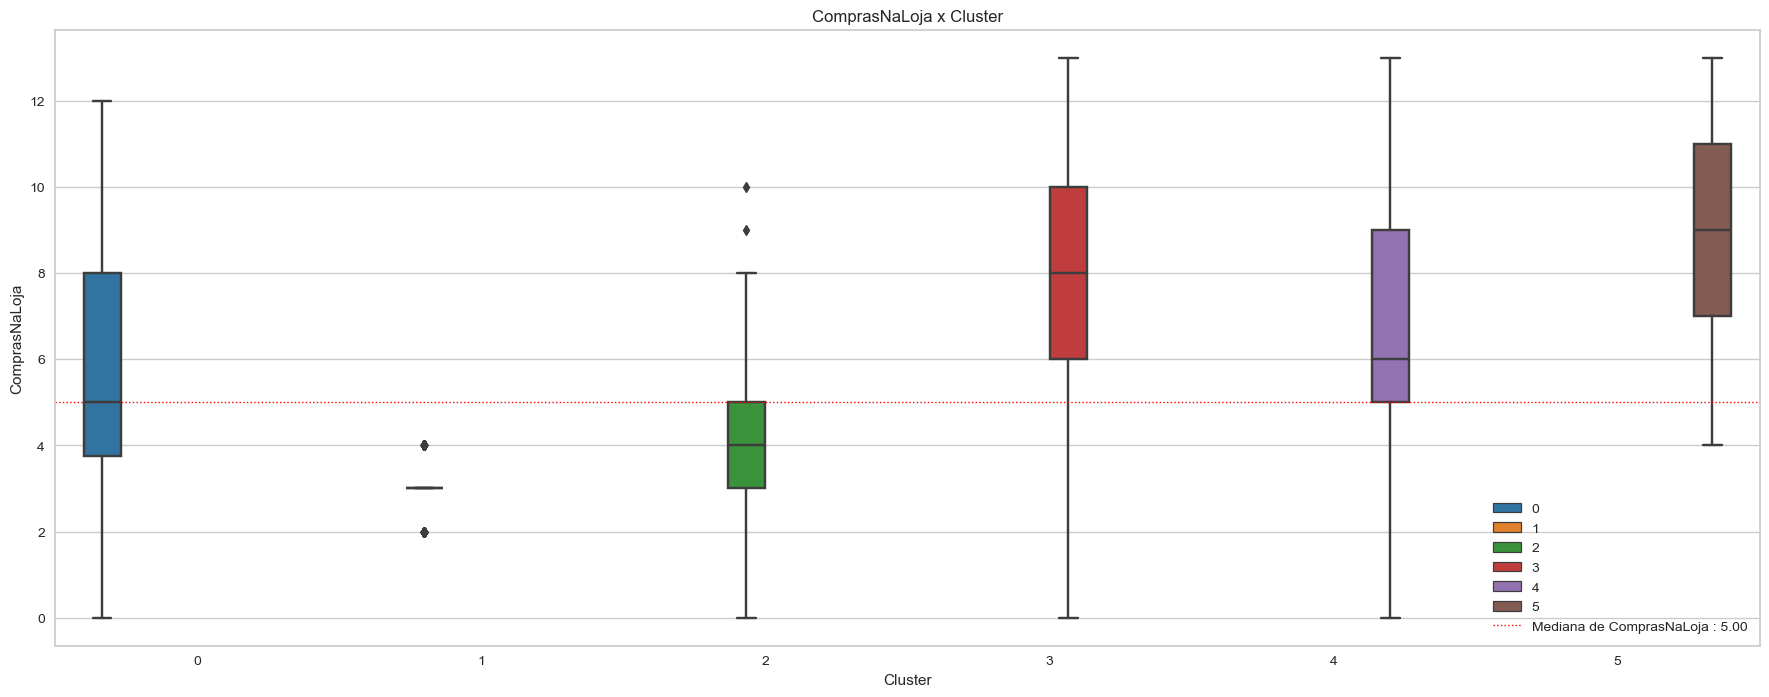

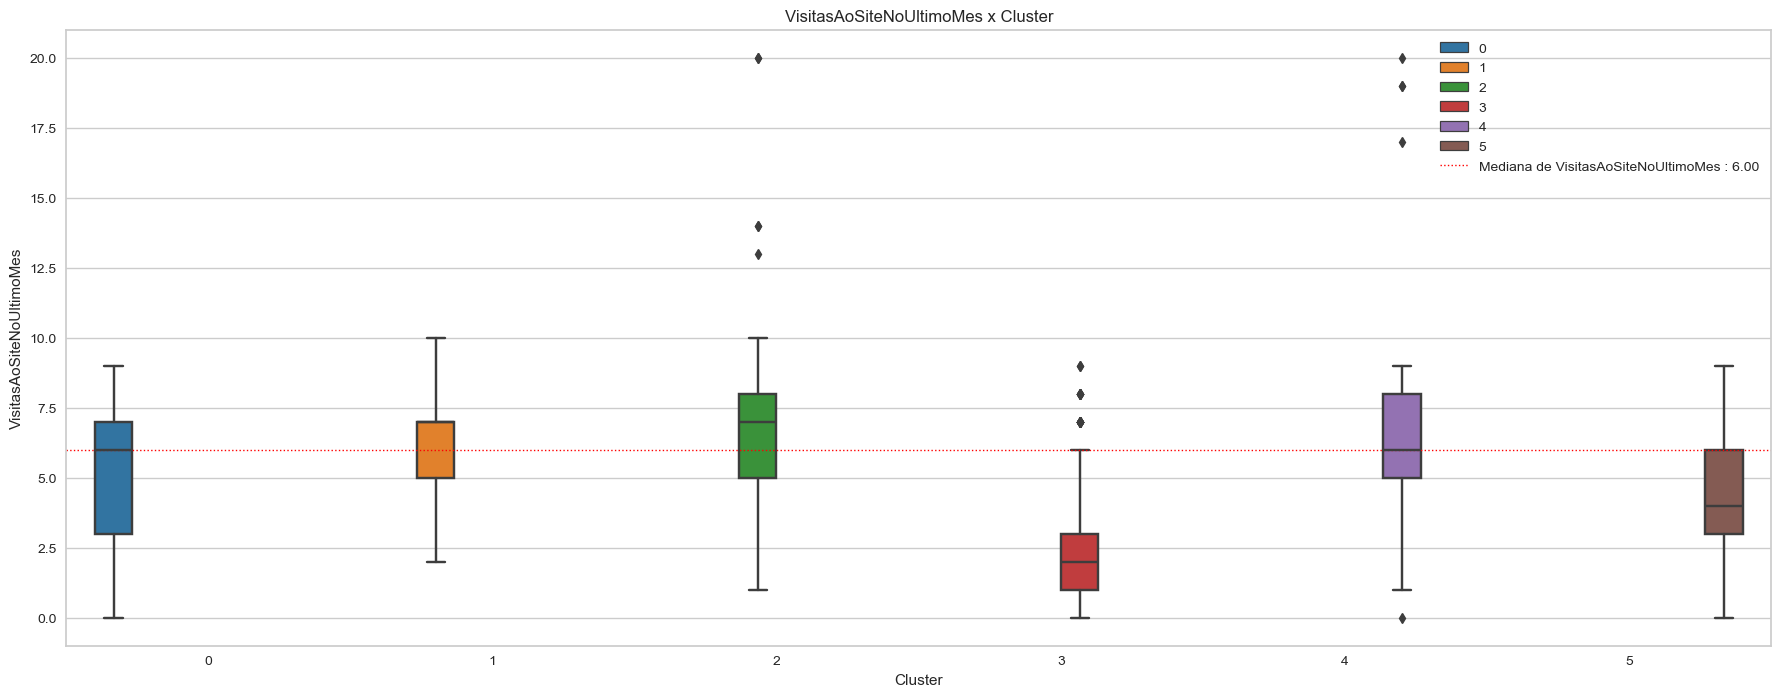

In [27]:
for var in ['DiasDesdeUltimaCompra','ComprasNoWeb','ComprasNaLoja','VisitasAoSiteNoUltimoMes']:
  plt.figure(figsize=(22, 8))
  pl=sns.boxplot(x=public["Cluster"], y=public[var], palette= pal, hue=public["Cluster"])

  mediana = public[var].median()
  text = f'Mediana de {var} :'+' {:.2f}'.format(mediana)
  plt.axhline(mediana, color='red', linestyle='dotted', linewidth=1, label=text)

  pl.set_title(f"{var} x Cluster")
  plt.legend()
  plt.show()

# Gráfico 1: Dias Desde Última Compra


### Cluster 0:

Mediana de dias desde a última compra: ~40 dias.


Amplitude interquartil: ~30-80 dias.


Insight: Clientes deste cluster tendem a fazer compras com maior frequência comparado aos outros clusters.


Ação: Enviar campanhas de reativação com base na frequência de compra para manter o engajamento.


### Cluster 1:


Mediana de dias desde a última compra: ~50 dias.


Amplitude interquartil: ~20-80 dias.


Insight: Frequência de compra mediana, similar à mediana geral.


Ação: Implementar programas de fidelidade que incentivem compras mais frequentes.


### Cluster 2:


Mediana de dias desde a última compra: ~49 dias.


Amplitude interquartil: ~20-75 dias.


Insight: Frequência de compra está próxima da mediana geral.


Ação: Enviar lembretes e ofertas personalizadas para incentivar compras regulares.


### Cluster 3:


Mediana de dias desde a última compra: ~48 dias.


Amplitude interquartil: ~20-75 dias.


Insight: Frequência de compra também próxima da mediana geral.


Ação: Oferecer descontos para compras repetidas.


### Cluster 4:


Mediana de dias desde a última compra: ~48 dias.


Amplitude interquartil: ~20-75 dias.


Insight: Frequência de compra estável.


Ação: Manter comunicação constante com ofertas sazonais.


### Cluster 5:


Mediana de dias desde a última compra: ~50 dias.


Amplitude interquartil: ~20-80 dias.


Insight: Frequência de compra mediana.


Ação: Introduzir novos produtos ou serviços para manter o interesse.


# Gráfico 2: Compras na Web


### Cluster 0:


Mediana de compras na web: ~7 compras.


Amplitude interquartil: ~3-10 compras.


Insight: Alta atividade de compras online.


Ação: Focar em campanhas de marketing digital e otimização de experiência online.


### Cluster 1:


Mediana de compras na web: ~2 compras.


Amplitude interquartil: ~1-4 compras.


Insight: Baixa atividade de compras online.


Ação: Incentivar compras online com ofertas exclusivas para o canal digital.


### Cluster 2:


Mediana de compras na web: ~4 compras.


Amplitude interquartil: ~1-8 compras.


Insight: Atividade mediana de compras online.


Ação: Melhorar a interface de usuário e oferecer benefícios adicionais para compras online.


### Cluster 3:


Mediana de compras na web: ~3 compras.


Amplitude interquartil: ~1-6 compras.


Insight: Atividade moderada de compras online.


Ação: Implementar programas de recompensa para compras frequentes online.


### Cluster 4:


Mediana de compras na web: ~5 compras.


Amplitude interquartil: ~2-8 compras.


Insight: Atividade acima da média de compras online.


Ação: Manter campanhas de marketing digital e explorar novos canais de vendas online.


### Cluster 5:

Mediana de compras na web: ~4 compras.


Amplitude interquartil: ~2-7 compras.


Insight: Atividade mediana de compras online.


Ação: Oferecer experiências de compra personalizadas e descontos exclusivos.


# Gráfico 3: Compras na Loja


### Cluster 0:


Mediana de compras na loja: ~7 compras.


Amplitude interquartil: ~4-10 compras.


Insight: Alta atividade de compras em loja física.


Ação: Melhorar a experiência em loja e oferecer programas de fidelidade exclusivos.


### Cluster 1:


Mediana de compras na loja: ~2 compras.


Amplitude interquartil: ~1-4 compras.


Insight: Baixa atividade de compras em loja física.


Ação: Incentivar visitas à loja física com eventos e promoções exclusivas.


### Cluster 2:


Mediana de compras na loja: ~4 compras.


Amplitude interquartil: ~1-6 compras.


Insight: Atividade mediana de compras em loja física.


Ação: Criar uma experiência de compra única que incentive visitas recorrentes.


### Cluster 3:


Mediana de compras na loja: ~4 compras.


Amplitude interquartil: ~1-7 compras.


Insight: Atividade moderada de compras em loja física.


Ação: Implementar estratégias para aumentar a frequência de visitas, como programas de pontos.


### Cluster 4:


Mediana de compras na loja: ~5 compras.


Amplitude interquartil: ~3-8 compras.


Insight: Atividade acima da média de compras em loja física.


Ação: Manter a qualidade do atendimento e criar eventos especiais para clientes frequentes.


### Cluster 5:


Mediana de compras na loja: ~6 compras.


Amplitude interquartil: ~3-8 compras.


Insight: Alta atividade de compras em loja física.


Ação: Oferecer benefícios exclusivos e experiências personalizadas para clientes frequentes.


# Gráfico 4: Visitas ao Site no Último Mês


### Cluster 0:


Mediana de visitas ao site: ~7 visitas.


Amplitude interquartil: ~4-10 visitas.


Insight: Alta atividade de visitas ao site.


Ação: Otimizar o site para melhorar a experiência do usuário e aumentar as conversões.


### Cluster 1:


Mediana de visitas ao site: ~5 visitas.


Amplitude interquartil: ~3-7 visitas.


Insight: Atividade mediana de visitas ao site.


Ação: Melhorar o conteúdo e a usabilidade do site para incentivar mais visitas.


### Cluster 2:


Mediana de visitas ao site: ~6 visitas.


Amplitude interquartil: ~4-8 visitas.


Insight: Atividade mediana de visitas ao site.


Ação: Criar campanhas de remarketing para aumentar a frequência das visitas.


### Cluster 3:


Mediana de visitas ao site: ~4 visitas.


Amplitude interquartil: ~2-6 visitas.


Insight: Baixa atividade de visitas ao site.


Ação: Incentivar visitas ao site com ofertas exclusivas e conteúdo relevante.


### Cluster 4:


Mediana de visitas ao site: ~6 visitas.


Amplitude interquartil: ~3-8 visitas.


Insight: Atividade mediana de visitas ao site.


Ação: Manter a relevância do conteúdo e a atratividade do site para aumentar as visitas.


### Cluster 5:


Mediana de visitas ao site: ~6 visitas.


Amplitude interquartil: ~4-8 visitas.


Insight: Atividade mediana de visitas ao site.


Ação: Melhorar a personalização do site para aumentar o engajamento dos visitantes.

# Resumo Geral


> Cluster 0: Alta frequência de compras online e na loja física, além de alta atividade no site. Focar em campanhas digitais e otimizar a experiência online.


> Cluster 1: Baixa frequência de compras online e na loja física, e atividade mediana no site. Incentivar visitas à loja física e compras online com ofertas exclusivas.


> Cluster 2: Atividade mediana de compras online e na loja física, e visitas ao site. Melhorar a personalização e oferecer benefícios adicionais.


> Cluster 3: Frequência de compra e visitas ao site abaixo da mediana. Implementar programas de recompensa e remarketing.


> Cluster 4: Frequência de compras na loja física e atividade no site acima da mediana. Manter a qualidade e criar eventos especiais.


> Cluster 5: Alta frequência de compras na loja física e atividade mediana no site. Oferecer benefícios exclusivos e experiências personalizadas.